<a href="https://colab.research.google.com/github/tsenga2/keio-senga-seminar/blob/main/figure4_%E3%80%80python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**’’下準備　ファイルダウンロードとpandasの準備’’**



In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm

In [ ]:
fileDownloaded = drive.CreateFile({'id': '1X5Khf4W6wDBWVa3uKVUjy5EFeyssDmYW'})
fileDownloaded.GetContentFile('figure4.csv')

In [ ]:
df = pd.read_csv('figure4.csv',encoding = "cp932")
df.head()

,企業名称,決算期,連結基準,現金・預金／現金及び現金同等物,長期借入金・社債・転換社債,短期借入金・社債合計,資産合計
0,極洋,1984/10,1,16300.0,13666.0,43039.0,93094.0
1,極洋,1985/10,1,14433.0,10611.0,35854.0,82267.0
2,極洋,1986/10,1,13787.0,10385.0,33587.0,82394.0
3,極洋,1987/10,1,13887.0,10510.0,35390.0,85497.0
4,極洋,1988/03,1,14008.0,9895.0,37819.0,82382.0


**データの下処理**　　
名称の変更

In [ ]:
df.rename(columns={'現金・預金／現金及び現金同等物': 'cash', '長期借入金・社債・転換社債': 'Ldebt', '短期借入金・社債合計': 'Sdebt', '資産合計': 'asset', '決算期': 'date'}, inplace=True)

In [ ]:
df.head

<bound method NDFrame.head of           企業名称     date  連結基準     cash    Ldebt     Sdebt     asset
0           極洋  1984/10     1  16300.0  13666.0   43039.0   93094.0
1           極洋  1985/10     1  14433.0  10611.0   35854.0   82267.0
2           極洋  1986/10     1  13787.0  10385.0   33587.0   82394.0
3           極洋  1987/10     1  13887.0  10510.0   35390.0   85497.0
4           極洋  1988/03     1  14008.0   9895.0   37819.0   82382.0
...        ...      ...   ...      ...      ...       ...       ...
80847  ポケットカード  2012/02     1  11317.0  27356.0  104640.0  228560.0
80848     ツヴァイ  2013/02     1    350.0      NaN       NaN    4975.0
80849     ツヴァイ  2014/02     1    309.0      NaN       NaN    4873.0
80850     ツヴァイ  2015/02     1    196.0      NaN       NaN    5064.0
80851     ツヴァイ  2016/02     1    177.0      NaN       NaN    5031.0

[80852 rows x 7 columns]>

**データの下処理**　　列ごとの計算を行い必要なデータを算出

In [ ]:
df['Element1']=df['Ldebt']+df['Sdebt']

In [ ]:
df['Element2']=df['Element1']-df['cash']

In [ ]:
df['BookL']=df['Element1']/df['asset']

In [ ]:
df['NetL']=df['Element2']/df['asset']

In [ ]:
df.head

<bound method NDFrame.head of           企業名称     date  連結基準     cash    Ldebt     Sdebt     asset  Element1  \
0           極洋  1984/10     1  16300.0  13666.0   43039.0   93094.0   56705.0   
1           極洋  1985/10     1  14433.0  10611.0   35854.0   82267.0   46465.0   
2           極洋  1986/10     1  13787.0  10385.0   33587.0   82394.0   43972.0   
3           極洋  1987/10     1  13887.0  10510.0   35390.0   85497.0   45900.0   
4           極洋  1988/03     1  14008.0   9895.0   37819.0   82382.0   47714.0   
...        ...      ...   ...      ...      ...       ...       ...       ...   
80847  ポケットカード  2012/02     1  11317.0  27356.0  104640.0  228560.0  131996.0   
80848     ツヴァイ  2013/02     1    350.0      NaN       NaN    4975.0       NaN   
80849     ツヴァイ  2014/02     1    309.0      NaN       NaN    4873.0       NaN   
80850     ツヴァイ  2015/02     1    196.0      NaN       NaN    5064.0       NaN   
80851     ツヴァイ  2016/02     1    177.0      NaN       NaN    5031.0       NaN  

**時系列順に揃える**

In [ ]:
df['date'] = pd.to_datetime(df['date'])
df = df.set_index(df['date'])
df.head

<bound method NDFrame.head of                企業名称       date  連結基準     cash    Ldebt     Sdebt     asset  \
date                                                                         
1984-10-01       極洋 1984-10-01     1  16300.0  13666.0   43039.0   93094.0   
1985-10-01       極洋 1985-10-01     1  14433.0  10611.0   35854.0   82267.0   
1986-10-01       極洋 1986-10-01     1  13787.0  10385.0   33587.0   82394.0   
1987-10-01       極洋 1987-10-01     1  13887.0  10510.0   35390.0   85497.0   
1988-03-01       極洋 1988-03-01     1  14008.0   9895.0   37819.0   82382.0   
...             ...        ...   ...      ...      ...       ...       ...   
2012-02-01  ポケットカード 2012-02-01     1  11317.0  27356.0  104640.0  228560.0   
2013-02-01     ツヴァイ 2013-02-01     1    350.0      NaN       NaN    4975.0   
2014-02-01     ツヴァイ 2014-02-01     1    309.0      NaN       NaN    4873.0   
2015-02-01     ツヴァイ 2015-02-01     1    196.0      NaN       NaN    5064.0   
2016-02-01     ツヴァイ 2016-02-01    

In [ ]:
df1 = df.resample('Y').mean()
df1.reset_index(inplace=True)
df1.head

<bound method NDFrame.head of          date      連結基準           cash          Ldebt          Sdebt  \
0  1975-12-31  2.000000  101957.166667  147961.529412  242232.294118   
1  1976-12-31  2.000000  106732.950000  151529.800000  230713.388889   
2  1977-12-31  2.000000  109820.629630  185612.960000  244391.600000   
3  1978-12-31  1.415385   72860.646154  113224.065574  151328.920635   
4  1979-12-31  1.346154   66395.333333   94164.368421  141561.578947   
5  1980-12-31  1.333333   71218.309524   96729.975000  154645.710843   
6  1981-12-31  1.301075   73674.784946   97789.390805  149035.956522   
7  1982-12-31  1.280000   78590.080000  100180.677083  155942.818182   
8  1983-12-31  1.233333   71517.033333   96069.831858  140242.256410   
9  1984-12-31  1.033294   26338.080856   38778.782338   52712.231796   
10 1985-12-31  1.029106   26201.968815   37762.653173   52339.523810   
11 1986-12-31  1.027861   26079.635821   39132.026233   52468.245168   
12 1987-12-31  1.027103   30203.59

**資産加重平均の計算準備**

In [ ]:
df2 = df.resample('Y').sum()
df2.reset_index(inplace=True)

In [ ]:
df2['BookL2']=df2['Element1']/df2['asset']
df2.head

<bound method NDFrame.head of          date  連結基準         cash        Ldebt        Sdebt         asset  \
0  1975-12-31    36    1835229.0    2515346.0    4117949.0  1.573538e+07   
1  1976-12-31    40    2134659.0    3030596.0    4152841.0  1.727431e+07   
2  1977-12-31    54    2965157.0    4640324.0    6109790.0  2.631765e+07   
3  1978-12-31    92    4735942.0    6906668.0    9533722.0  4.106814e+07   
4  1979-12-31   105    5178836.0    7156492.0   10758680.0  4.603453e+07   
5  1980-12-31   112    5982338.0    7738398.0   12835594.0  5.542516e+07   
6  1981-12-31   121    6851755.0    8507677.0   13711308.0  6.079378e+07   
7  1982-12-31   128    7859008.0    9617345.0   15438339.0  6.902647e+07   
8  1983-12-31   148    8582044.0   10855891.0   16408344.0  7.410940e+07   
9  1984-12-31   869   22150326.0   31178141.0   43434879.0  1.866099e+08   
10 1985-12-31   990   25206294.0   34515065.0   49460850.0  2.143974e+08   
11 1986-12-31  1033   26210034.0   37292821.0   51576285.0

**グラフ作成のコード**

<Figure size 432x288 with 0 Axes>

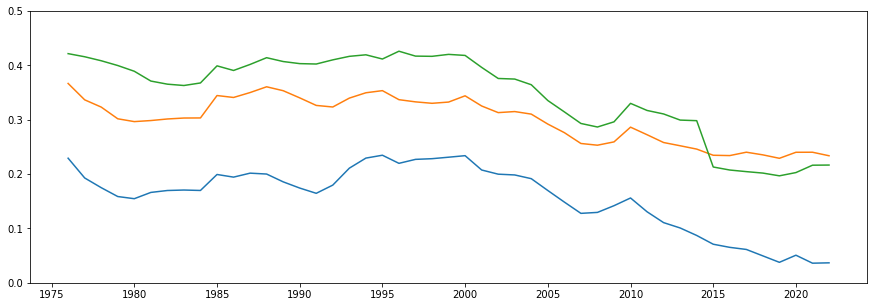

In [ ]:
x = df1['date']
y = df1['NetL']
fig = plt.figure()
fig, ax1 = plt.subplots(figsize=(15,5))
ax1.plot(x,y)
ax1.set_ylim([0,0.5])
x1 = df1['date']
y1 = df1['BookL']
ax1.plot(x1,y1)
x2 = df1['date']
y2 = df2['BookL2']
ax1.plot(x2,y2)